In [104]:
import pandas as pd

data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/Data(24.03.12)/data(use)/data(small)/train/train_data_small.csv")

data_row

,Unnamed: 0,word,predict
0,1168,기존,fishing
1,975,만,fishing
2,420,벌금,NO fishing
3,680,연령,NO fishing
4,409,앞,NO fishing
...,...,...,...
1477,359,일자,NO fishing
1478,900,금융,fishing
1479,1178,밑,fishing
1480,1076,그때,fishing


In [105]:
data_row.isnull().sum()

Unnamed: 0    0
word          0
predict       0
dtype: int64

In [106]:
data_row.drop(columns=["Unnamed: 0"],inplace=True)

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [108]:
print(data_row.iloc[1,0]==data_row.iloc[2,0])

False


In [109]:
A=le.fit_transform(data_row['word'])

In [110]:
A.dtype

dtype('int64')

In [111]:
for i in range(data_row.shape[0]):
    data_row.iloc[i,0]=A[i]

In [112]:
data=data_row

In [113]:
A=le.fit_transform(data['predict'])

In [114]:
data

,word,predict
0,212,fishing
1,353,fishing
2,438,NO fishing
3,697,NO fishing
4,665,NO fishing
...,...,...
1477,826,NO fishing
1478,191,fishing
1479,404,fishing
1480,179,fishing


In [115]:
A

array([1, 1, 0, ..., 1, 1, 0])

In [116]:
for i in range(data.shape[0]):
    data.iloc[i,1]=A[i]

In [117]:
data.columns

Index(['word', 'predict'], dtype='object')

In [118]:
data

,word,predict
0,212,1
1,353,1
2,438,0
3,697,0
4,665,0
...,...,...
1477,826,0
1478,191,1
1479,404,1
1480,179,1


In [119]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data=pd.DataFrame(scaler.fit_transform(data),columns=['word','predict'])

In [120]:
data.astype('int32').dtypes

word       int32
predict    int32
dtype: object

In [121]:
x_train=pd.DataFrame(data=data['word'],columns=['word'])

In [122]:
x_train

,word
0,-1.129633
1,-0.723307
2,-0.478359
3,0.268012
4,0.175796
...,...
1477,0.639756
1478,-1.190150
1479,-0.576339
1480,-1.224730


In [123]:

y_train=pd.DataFrame(data=data['predict'],columns=['predict'],copy=True)

In [124]:

y_train

,predict
0,1.215838
1,1.215838
2,-0.822478
3,-0.822478
4,-0.822478
...,...
1477,-0.822478
1478,1.215838
1479,1.215838
1480,1.215838


In [125]:

x_train.astype('int32').dtypes
y_train.astype('int32').dtypes


predict    int32
dtype: object

In [126]:
data=x_train

In [127]:
target=y_train

In [128]:
import numpy as np
from sklearn.model_selection import train_test_split

In [129]:
x_train['word']=x_train['word'].astype(float)
y_train['predict']=y_train['predict'].astype(float)

In [130]:
x_train,x_valid,y_train,y_valid=train_test_split(data,target,test_size=0.2,shuffle=True,stratify=target)

In [131]:
print(x_train.dtypes)
print(y_train.dtypes)
print(x_valid.dtypes)

word    float64
dtype: object
predict    float64
dtype: object
word    float64
dtype: object


In [134]:

from xgboost import XGBRegressor

# 모델 선언 예시
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [140]:
y_pred=pd.DataFrame(model.predict(x_valid),columns=['predict'])

In [141]:
y_valid

,predict
831,1.215838
834,-0.822478
26,1.215838
51,1.215838
1314,-0.822478
...,...
1405,-0.822478
181,-0.822478
1256,-0.822478
1062,-0.822478


In [142]:
y_pred

,predict
0,-0.778956
1,0.385825
2,0.079528
3,0.024330
4,0.232969
...,...
292,-0.019089
293,-0.397373
294,0.629256
295,0.254146


In [145]:
import matplotlib.pyplot as plt
import numpy as np

In [146]:
y_pred=np.array(y_pred)
y_valid=np.array(y_valid)

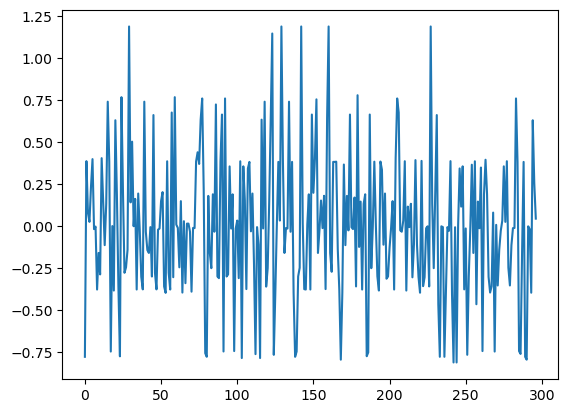

In [148]:
plt.plot(y_pred)

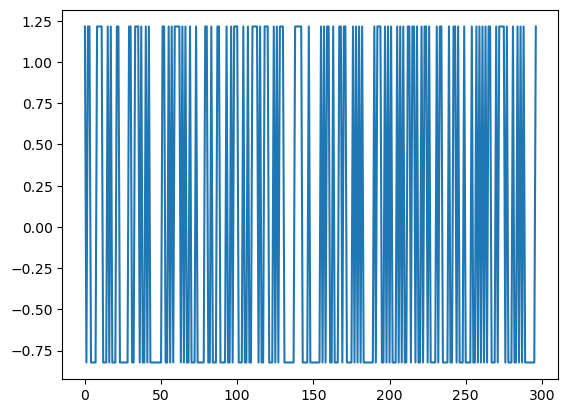

In [150]:
plt.plot(y_valid)

ValueError: continuous is not supported

In [84]:
test_data=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/Data(24.03.12)/data(use)/data(small)/test/test_data_small.csv")

In [85]:
test_data

,Unnamed: 0,word,predict
0,0,상시,NO fishing
1,1,우편,NO fishing
2,2,요금,NO fishing
3,3,근거,fishing
4,4,구분,NO fishing
...,...,...,...
195,195,세탁,fishing
196,196,실업,NO fishing
197,197,맹점,NO fishing
198,198,걸로,NO fishing


In [86]:
test_data.drop(columns=['Unnamed: 0'],inplace=True)

In [87]:
x_test=pd.DataFrame(data=test_data['word'],columns=['word'])

In [88]:
x_test

,word
0,상시
1,우편
2,요금
3,근거
4,구분
...,...
195,세탁
196,실업
197,맹점
198,걸로


In [89]:
y_test=pd.DataFrame(data=test_data['predict'],columns=['predict'])

In [90]:
y_test

,predict
0,NO fishing
1,NO fishing
2,NO fishing
3,fishing
4,NO fishing
...,...
195,fishing
196,NO fishing
197,NO fishing
198,NO fishing


In [91]:
#le = LabelEncoder()

In [92]:
x_test=le.fit_transform(x_test['word'])
y_test=le.fit_transform(y_test['predict'])

In [93]:
x_test

array([ 90, 115, 114,  32,  24,  13,  10, 109, 173, 184,  38,  25,  47,
       121,  27,  41,  36, 162,  39,  44,  18,  26,  82,  77,  85, 125,
       171, 116, 148, 157,  37,  60, 179,  22,  28,  57, 146, 118,  59,
        75, 131, 130,  78, 170,  94,  78,  86,  68,  87,  63, 121,  72,
       163,  76, 181, 129, 169,   0, 178, 124,  95, 182,  89,  91, 184,
        97, 102,  30,   7, 172, 152,   5,  64,  34, 180,  12, 117,   4,
       119,  54,  52,  79, 101, 174, 110, 133, 159,  42, 164,   2, 134,
         1,  67, 157,  46,  19,   9, 166, 104,  45,   6, 155, 168,  23,
        11, 135,  43, 154,  93,  47,  48, 140,  14, 145, 137, 147,  20,
       161,  70, 143,  69,   8,  38, 132,  97, 177,   6, 113, 120,  74,
       111,  65, 144,  99, 150, 103, 142,  73,  15,  49,  58,  51,  40,
       139, 136,  96, 151, 167, 149, 183, 122, 127, 185,  35, 138,  55,
         5, 107, 112, 153, 123, 141,  71,  33,  98,  80,  58,  16,  53,
        50,  81,  29, 108, 108,  88,  84,  61,  21, 165, 160, 10

In [94]:
y_test

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1])

In [95]:
x_test=pd.DataFrame(data=x_test,columns=['word'])
y_test=pd.DataFrame(data=y_test,columns=['predict'])

In [96]:
x_test

,word
0,90
1,115
2,114
3,32
4,24
...,...
195,92
196,105
197,56
198,17


In [97]:
y_train

,predict
705,0.0
104,1.0
546,0.0
876,0.0
34,0.0
...,...
1084,0.0
1079,1.0
867,1.0
1419,1.0


In [98]:
pred=model.predict(x_test)

In [99]:
pred=pd.DataFrame(data=pred,columns=['predict'])

In [100]:
pred

,predict
0,1
1,0
2,0
3,0
4,0
...,...
195,0
196,1
197,1
198,1


In [101]:
y_test

,predict
0,0
1,0
2,0
3,1
4,0
...,...
195,1
196,0
197,0
198,0


In [102]:
print("XGBoost 보이스 피싱 탐지 테스트 정확도 : ", format(accuracy_score(y_test,pred)*100))

XGBoost 보이스 피싱 탐지 테스트 정확도 :  60.0


In [103]:
print(f1_score(y_test, pred, zero_division=1.0))

0.3103448275862069
